In [1]:
root_name = 'SF_DD_20180831'
print(root_name)

SF_DD_20180831


In [2]:
import pandas as pd
df = pd.read_csv(root_name+'_Cleaned.csv',encoding='utf-8')
df.head()

,Unnamed: 0,Unnamed: 0.1,No,page,nick,time,content,area,ip,length,...,channel,hot,level,login_type,media_type,mid,stamp,time_ymd,time_mdh,cmntcount
0,0,0,1,1,放开一切97697,2018-08-28 13:32:22,就是要搞垮你，再让别人来，你不尊重生命，让尊重生命的来,湖北武汉,27.17.139.47,27,...,cj,0,2,0,0,5B84DE65-1B118B2F-13B559EFC-917-7E9,1535434342,2018-08-28,08-28 13,139
1,1,1,2,1,zyh专业化550空荡荡,2018-08-27 16:55:34,zyh专业化550空荡荡：事情发生这么多，该想办法，道歉对于被害者来说都是浮云。比方说：参加...,浙江嘉兴,122.238.59.61,193,...,cj,0,0,0,0,5B83BC87-7AEE3B3D-163526120-917-8F1,1535360134,2018-08-27,08-27 16,138
2,2,2,3,1,95尹天仇,2018-08-27 16:18:52,唉，问题的关键是就算拿皮鞭抽他滴滴公司的CEO几百下，也于事无补,北京,117.136.0.253,32,...,cj,0,0,1,0,5B83B3ED-758800FD-168146D03-917-961,1535357932,2018-08-27,08-27 16,137
3,3,3,4,1,用户159****4857,2018-08-27 05:40:06,😡对！！！说到关健点了，看看滴滴用了什么运载工具为乘客服務？車上居然带着利斧、匕首、木棍！谈...,上海,180.158.67.105,62,...,cj,0,1,2,0,5B831E36-B49E4369-595C88948743619F-917-8BA,1535319606,2018-08-27,08-27 05,136
4,4,4,5,1,用户3898863072,2018-08-27 05:37:47,消灭滴滴人人有责。。,上海,180.158.110.35,10,...,cj,0,0,0,0,5B831DAB-B49E6E23-E863EDE0-917-926,1535319467,2018-08-27,08-27 05,135


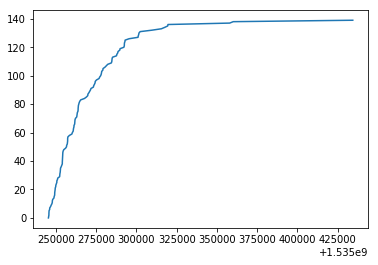

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df.stamp, df.cmntcount);

In [4]:
df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()

In [5]:
df_ymdcount = df.groupby('time_ymd')['cmntcount'].count()
print(df_ymdcount)

from pyecharts import Line
line = Line("每日评论数变化情况")
line.add("日期", df_ymdcount.index, df_ymdcount.values,line_type='dotted')
line

time_ymd
2018-08-26    127
2018-08-27     12
2018-08-28      1
Name: cmntcount, dtype: int64


In [6]:
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
#print(df_mdhcount)

from pyecharts import Line
line = Line("每小时评论数")
line.add("小时", df_mdhcount.index, df_mdhcount.values,line_opacity=1,line_type='dotted')
line

In [7]:
from pyecharts import Bar
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=0,xaxis_rotate=-90)
bar

In [8]:
df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap